In this notebook, you'll learn about bar charts and heatmaps.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

[Dataset](https://www.kaggle.com/yuanyuwendymu/airline-delay-and-cancellation-data-2009-2018) used comprises flight info of U.S. domestic flights.

In [2]:
org_data = pd.read_csv('../../datasets/flight-delays/2015.csv')
org_data.head()

,FL_DATE,OP_CARRIER,OP_CARRIER_FL_NUM,ORIGIN,DEST,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,...,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,Unnamed: 27
0,2015-01-01,NK,195,MCO,FLL,2147,2143.0,-4.0,15.0,2158.0,...,63.0,62.0,40.0,177.0,NaN,NaN,NaN,NaN,NaN,NaN
1,2015-01-01,NK,197,LGA,FLL,1050,1104.0,14.0,20.0,1124.0,...,194.0,179.0,150.0,1076.0,NaN,NaN,NaN,NaN,NaN,NaN
2,2015-01-01,NK,198,FLL,MCO,700,712.0,12.0,19.0,731.0,...,57.0,61.0,32.0,177.0,0.0,0.0,16.0,0.0,0.0,NaN
3,2015-01-01,NK,199,IAH,LAS,2240,2251.0,11.0,8.0,2259.0,...,196.0,176.0,164.0,1222.0,NaN,NaN,NaN,NaN,NaN,NaN
4,2015-01-01,NK,200,IAH,ORD,623,620.0,-3.0,15.0,635.0,...,152.0,140.0,115.0,925.0,NaN,NaN,NaN,NaN,NaN,NaN


We first do data transformations so that we can perform visualisations on it:

In [3]:
# we retain only the columns we need
flight_data = org_data.loc[:,['FL_DATE', 'OP_CARRIER', 'ARR_DELAY']]

# drop rows with missing ARR_DELAY values
flight_data.dropna(inplace=True)

# parse FL_DATE column to string, then to datetime format and retain only the month
flight_data['month'] = pd.to_datetime(flight_data['FL_DATE'], format='%Y-%m-%d').dt.month

# we take the mean of arrival delay time, grouped by month and carrier; reset index to drop multiindex
flight_data = flight_data.groupby(['month', 'OP_CARRIER']).mean('ARR_DELAY').reset_index()

# converting from long to wide format
flight_data = flight_data.pivot(index='month', columns='OP_CARRIER', values='ARR_DELAY')
flight_data.head()

OP_CARRIER,AA,AS,B6,DL,EV,F9,HA,MQ,NK,OO,UA,US,VX,WN
month,,,,,,,,,,,,,,
1,6.955843,-0.320888,7.347281,-2.043847,8.537497,18.357238,3.512640,18.164974,11.398054,10.889894,6.352729,3.107457,1.420702,3.389466
2,7.530204,-0.782923,18.657673,5.614745,10.417236,27.424179,6.029967,21.301627,16.474466,9.588895,7.260662,7.114455,7.784410,3.501363
3,6.693587,-0.544731,10.741317,2.077965,6.730101,20.074855,3.468383,11.018418,10.039118,3.181693,4.892212,3.330787,5.348207,3.263341
4,4.931778,-3.009003,2.780105,0.083343,4.821253,12.640440,0.011022,5.131228,8.766224,3.223796,4.376092,2.660290,0.995507,2.996399
5,5.173878,-1.716398,-0.709019,0.149333,7.724290,13.007554,0.826426,5.466790,22.397347,4.141162,6.827695,0.681605,7.102021,5.680777


In [5]:
# Print the last five rows of the data
flight_data.tail()

OP_CARRIER,AA,AS,B6,DL,EV,F9,HA,MQ,NK,OO,UA,US,VX,WN
month,,,,,,,,,,,,,,
8,3.193907,2.503899,9.280950,0.653114,5.154422,9.175737,7.448029,1.896565,20.519018,5.606689,5.014041,NaN,5.106221,5.532108
9,-1.432732,-1.813800,3.539154,-3.703377,0.851062,0.978460,3.696915,-2.167268,8.000101,1.530896,-1.794265,NaN,0.070998,-1.336260
10,-0.580930,-2.993617,3.676787,-5.011516,2.303760,0.082127,0.467074,-3.735054,6.810736,1.750897,-2.456542,NaN,2.254278,-0.688851
11,0.772630,-1.916516,1.418299,-3.175414,4.415930,11.164527,-2.719894,0.220061,7.543881,4.925548,0.281064,NaN,0.116370,0.995684
12,4.149684,-1.846681,13.839290,2.504595,6.685176,9.346221,-1.706475,0.662486,12.733123,10.947612,7.012079,NaN,13.498720,6.720893


## Plot the data

Now that the dataset is loaded, we can create a bar chart showing the average arrival delay for, say, Spirit Airlines (airline code: NK) flights, by month:

Text(0, 0.5, 'Arrival delay (in minutes)')

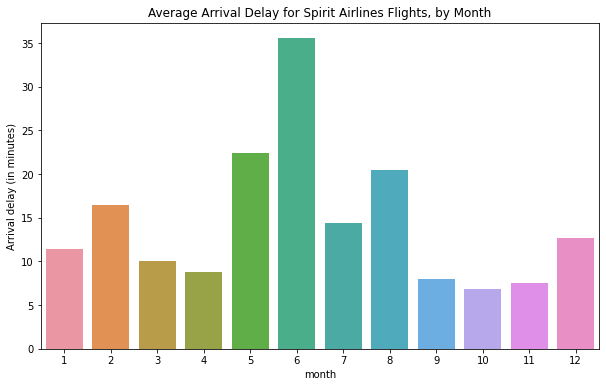

In [6]:
# Set the width and height of the figure
plt.figure(figsize=(10,6))

# Add title
plt.title("Average Arrival Delay for Spirit Airlines Flights, by Month")

# Bar chart showing average arrival delay for Spirit Airlines flights by month
sns.barplot(x=flight_data.index, y=flight_data['NK'])

# Add label for vertical axis
plt.ylabel("Arrival delay (in minutes)")

The commands for customizing the text (title and vertical axis label) and size of the figure are familiar from the previous chapter. The code that creates the bar chart is new:

```python
# Bar chart showing average arrival delay for Spirit Airlines flights by month
sns.barplot(x=flight_data.index, y=flight_data['NK'])
```
It has three main components:

+ `sns.barplot` - This tells the notebook that we want to create a bar chart.       
+ `x=flight_data.index` - This determines what to use on the horizontal axis. In this case, we have selected the index column containing the months
+ `y=flight_data['NK']` - This sets the column in the data that will be used to determine the height of each bar. In this case, we select the 'NK' column.

**Important Note:** It is not possible to use `flight_data['Month']` for indexing column in this case (which will return an error). This is because when we loaded the dataset, the "Month" column was used to index the rows, thus `flight_data['Month']` will return an error stating 'Month' is not found among the dataframe's attributes. 

We can also flip to show horizontal bar plot, passing in `orient='h'` into `sns.barplot()`:

Text(0.5, 0, 'Arrival delay (in minutes)')

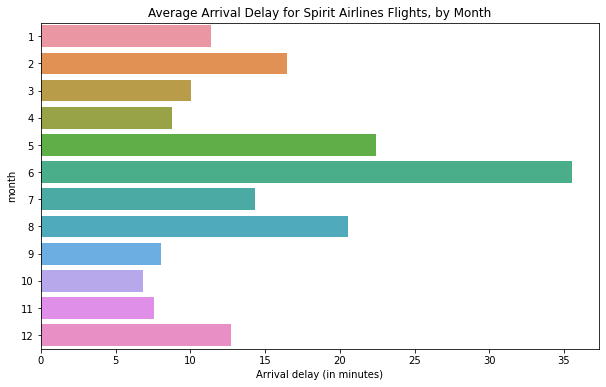

In [7]:
plt.figure(figsize=(10,6))
plt.title("Average Arrival Delay for Spirit Airlines Flights, by Month")

# Horizontal bar chart; note that we flipped the x and y compared to previous example
sns.barplot(x=flight_data['NK'], y=flight_data.index, orient='h')

# Add label for horizontal axis
plt.xlabel("Arrival delay (in minutes)")

## Heatmap

We have one more plot type to learn about: heatmaps!

In the code cell below, we create a heatmap to quickly visualize patterns in flight_data. Each cell is color-coded according to its corresponding value.

Text(0.5, 42.0, 'Airline')

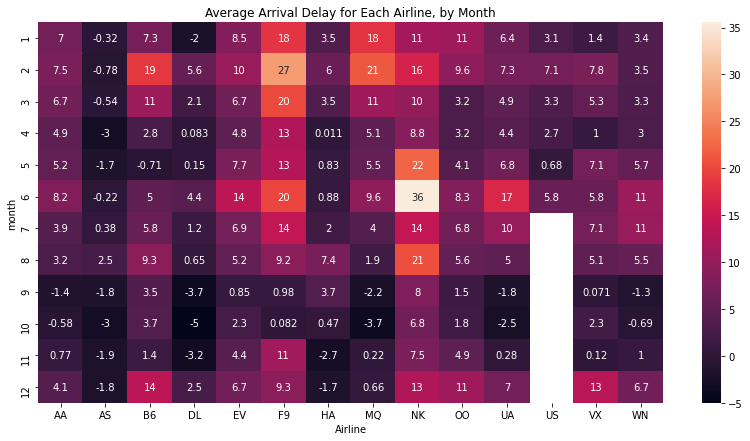

In [8]:
# Set the width and height of the figure
plt.figure(figsize=(14,7))

# Add title
plt.title("Average Arrival Delay for Each Airline, by Month")

# Heatmap showing average arrival delay for each airline by month
sns.heatmap(data=flight_data, annot=True)

# Add label for horizontal axis
plt.xlabel("Airline")

The relevant code to create the heatmap is as follows:

```python
# Heatmap showing average arrival delay for each airline by month
sns.heatmap(data=flight_data, annot=True)`
```
This code has three main components:

+ `sns.heatmap` - This tells the notebook that we want to create a heatmap.
+ `data=flight_data` - This tells the notebook to use all of the entries in flight_data to create the heatmap.
+ `annot=True` - This ensures that the values for each cell appear on the chart. (Leaving this out removes the numbers from each of the cells!)

Next up, we'll learn about [scatterplots](https://github.com/colintwh/visualisation/blob/master/scatterplots.ipynb)